## Loading required libraries

In [1]:
from gapminder import gapminder
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Setting matplotlib parameters for plotting

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16
LARGE_SIZE = 20

params = {
    'figure.figsize': (16, 8),
    'font.size': SMALL_SIZE,
    'xtick.labelsize': MEDIUM_SIZE,
    'ytick.labelsize': MEDIUM_SIZE,
    'legend.fontsize': BIG_SIZE,
    'figure.titlesize': LARGE_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': BIG_SIZE
}

plt.rcParams.update(params)

## Loading and Inspecting the data

In [3]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.80,8425333,779.45
1,Afghanistan,Asia,1957,30.33,9240934,820.85
2,Afghanistan,Asia,1962,32.00,10267083,853.10
3,Afghanistan,Asia,1967,34.02,11537966,836.20
4,Afghanistan,Asia,1972,36.09,13079460,739.98


In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [5]:
gapminder.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1704.00,1979.50,17.27,1952.00,1965.75,1979.50,1993.25,2007.00
lifeExp,1704.00,59.47,12.92,23.60,48.20,60.71,70.85,82.60
pop,1704.00,29601212.32,106157896.74,60011.00,2793664.00,7023595.50,19585221.75,1318683096.00
gdpPercap,1704.00,7215.33,9857.45,241.17,1202.06,3531.85,9325.46,113523.13


In [6]:
print(f"We have data from {gapminder['year'].min()} to {gapminder['year'].max()}.")

We have data from 1952 to 2007.


## Exploring the data

We have life expectancy, population and GDP per capita data from 1952 to 2007. Let's filter the data with year 2007 and explore it.

In [7]:
gapminder_2007 = gapminder[gapminder["year"] == 2007]

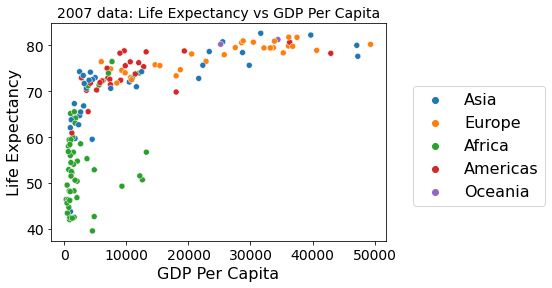

In [8]:
sns.scatterplot(data = gapminder_2007, x = "gdpPercap", y = "lifeExp", hue = "continent")
plt.xlabel("GDP Per Capita")
plt.ylabel("Life Expectancy")
plt.title("2007 data: Life Expectancy vs GDP Per Capita")
plt.legend(bbox_to_anchor = (1.5, 0.75))
plt.show()

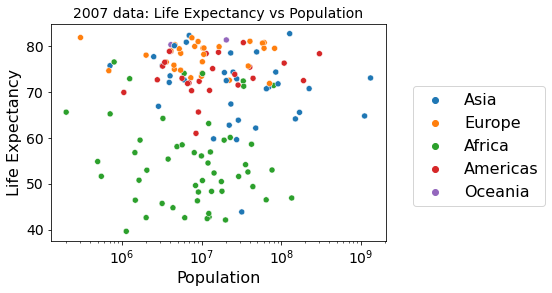

In [9]:
sns.scatterplot(data = gapminder_2007, x = "pop", y = "lifeExp", hue = "continent")
plt.xscale("log")
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("2007 data: Life Expectancy vs Population")
plt.legend(bbox_to_anchor = (1.5, 0.75))
plt.show()

Above graph shows that **Oceania, Europe and Americas** Countries has high life Expectancy and GDP Per Capita as compared to **Asia and Africa** countries.

Now, let's explore how life expectancy varies between continents. We will use the same filtered data of 2007 year.

In [10]:
mean_life_exp = gapminder_2007.groupby("continent", as_index = False)["lifeExp"].mean()

In [11]:
mean_life_exp

,continent,lifeExp
0,Africa,54.81
1,Americas,73.61
2,Asia,70.73
3,Europe,77.65
4,Oceania,80.72


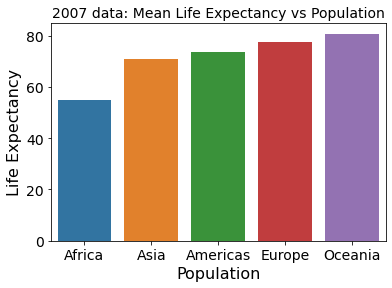

In [12]:
sns.barplot(data = mean_life_exp, x = "continent", y = "lifeExp", order = mean_life_exp.sort_values(["lifeExp"]).continent)
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("2007 data: Mean Life Expectancy vs Population")
plt.show()

**Oceania** has the highest mean life expectancy followed by **Europe, Americas and Asia. Africa** has worst mean life expectancy of all.

In [13]:
# Countries with worst Life Expectancy in each continent

min_life_exp_ind = gapminder_2007.groupby("continent")["lifeExp"].agg("idxmin").to_list()
gapminder.iloc[min_life_exp_ind, :].reset_index(drop = True)

,country,continent,year,lifeExp,pop,gdpPercap
0,Swaziland,Africa,2007,39.61,1133066,4513.48
1,Haiti,Americas,2007,60.92,8502814,1201.64
2,Afghanistan,Asia,2007,43.83,31889923,974.58
3,Turkey,Europe,2007,71.78,71158647,8458.28
4,New Zealand,Oceania,2007,80.20,4115771,25185.01


In [14]:
# Countries with best Life Expectancy in each continent

max_life_exp_ind = gapminder_2007.groupby("continent")["lifeExp"].agg("idxmax").to_list()
gapminder.iloc[max_life_exp_ind, :].reset_index(drop = True)

,country,continent,year,lifeExp,pop,gdpPercap
0,Reunion,Africa,2007,76.44,798094,7670.12
1,Canada,Americas,2007,80.65,33390141,36319.24
2,Japan,Asia,2007,82.60,127467972,31656.07
3,Iceland,Europe,2007,81.76,301931,36180.79
4,Australia,Oceania,2007,81.23,20434176,34435.37


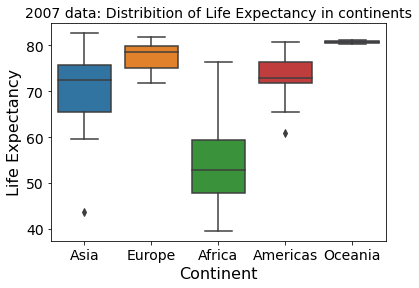

In [15]:
sns.boxplot(data = gapminder_2007, x = "continent", y = "lifeExp")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy")
plt.title("2007 data: Distribition of Life Expectancy in continents")
plt.show()

Life Expectancy varies more in **Africa** than other continent. Median Life Expectancy is also lowest among all.

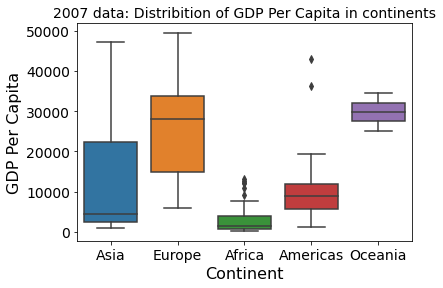

In [16]:
sns.boxplot(data = gapminder_2007, x = "continent", y = "gdpPercap")
plt.xlabel("Continent")
plt.ylabel("GDP Per Capita")
plt.title("2007 data: Distribition of GDP Per Capita in continents")
plt.show()

GDP Per Capita varies more in **Asia and European** countries as compared to countries in other continents.

Let's look at life expectancy, population and GDP per capita data of India.

In [17]:
gapminder_india = gapminder[gapminder["country"] == "India"]
gapminder_india

,country,continent,year,lifeExp,pop,gdpPercap
696,India,Asia,1952,37.37,372000000,546.57
697,India,Asia,1957,40.25,409000000,590.06
698,India,Asia,1962,43.60,454000000,658.35
699,India,Asia,1967,47.19,506000000,700.77
700,India,Asia,1972,50.65,567000000,724.03
701,India,Asia,1977,54.21,634000000,813.34
702,India,Asia,1982,56.60,708000000,855.72
703,India,Asia,1987,58.55,788000000,976.51
704,India,Asia,1992,60.22,872000000,1164.41
705,India,Asia,1997,61.77,959000000,1458.82


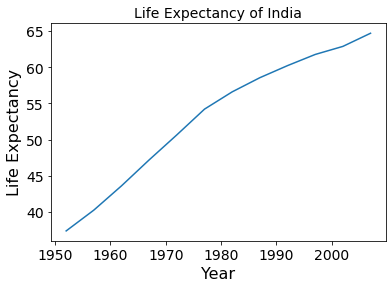

In [18]:
sns.lineplot(data = gapminder_india,  x = "year", y = "lifeExp")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy of India")
plt.show()

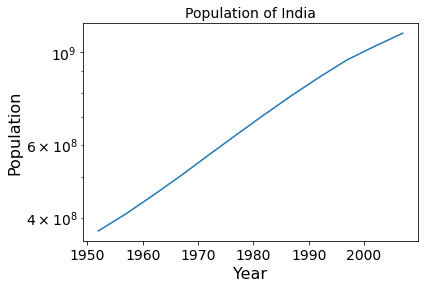

In [19]:
sns.lineplot(data = gapminder_india,  x = "year", y = "pop")
plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population of India")
plt.show()

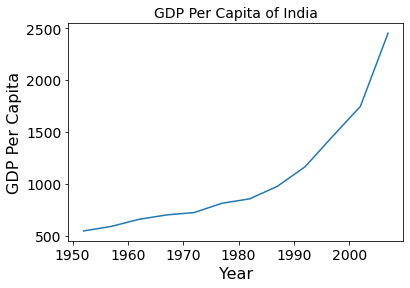

In [20]:
sns.lineplot(data = gapminder_india,  x = "year", y = "gdpPercap")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.title("GDP Per Capita of India")
plt.show()

Life Expectancy of India has increased from 37.373 years to 64.698 years.

Population of India has increased dramtically from 372 Million to 1.11 Billion.

GDP Per Capita has increased from 546.56 to 2452.21.

In [21]:
corr = gapminder[["lifeExp", "pop", "gdpPercap"]].corr()
corr

,lifeExp,pop,gdpPercap
lifeExp,1.00,0.06,0.58
pop,0.06,1.00,-0.03
gdpPercap,0.58,-0.03,1.00


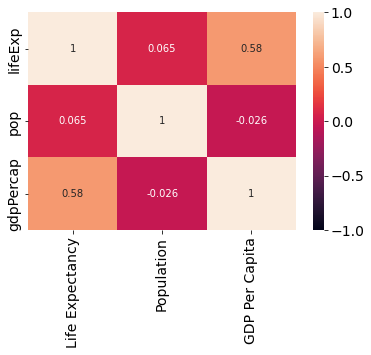

In [22]:
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1,
           xticklabels = ["Life Expectancy", "Population", "GDP Per Capita"])
plt.show()

**GDP Per Capita and Life Expectancy** has high positive correlation between them.

In [23]:
country_list = ["United States", "United Kingdom", "Canada", "France", "Spain", "Australia", "Japan"]

In [24]:
select_country = gapminder[gapminder["country"].isin(country_list)]

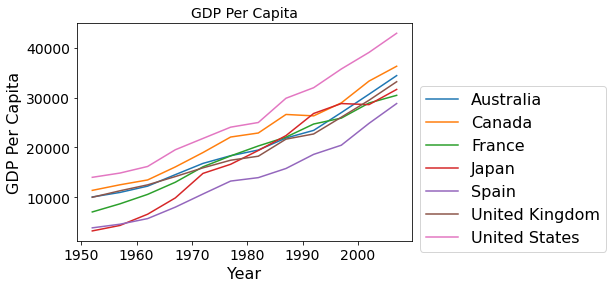

In [25]:
sns.lineplot(data = select_country,  x = "year", y = "gdpPercap", hue = "country")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.title("GDP Per Capita")
plt.legend(bbox_to_anchor = (1, 0.75))
plt.show()

**United States** has highest GDP Per Capita from 1952 to 2007 following by **Canada**. GDP Per Capita is trending similar in European Countries.